In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn as svm
import numpy as np 
import seaborn as sns

In [2]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df= df.drop(columns=["Unnamed: 0"])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.drop_duplicates()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [7]:
df.dropna(axis=0)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
df.dropna(axis=1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [9]:
df.shape 

(200, 4)

In [10]:
df.isnull().values.any()

False

In [11]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

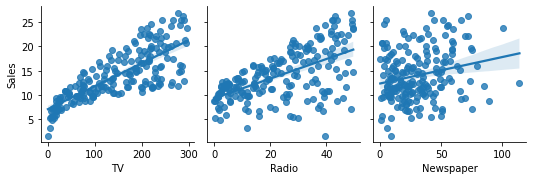

In [14]:
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars= "Sales",kind="reg")
plt.show()

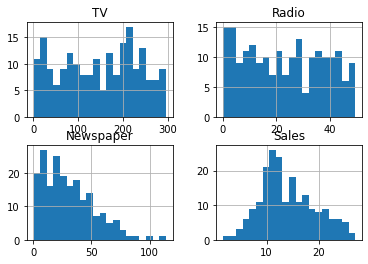

In [15]:
df.hist(bins=20)
plt.show()

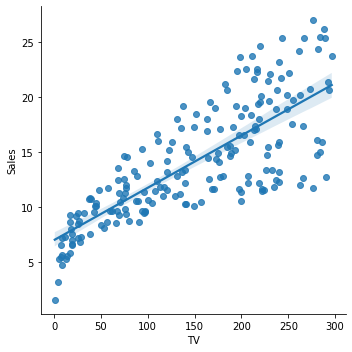

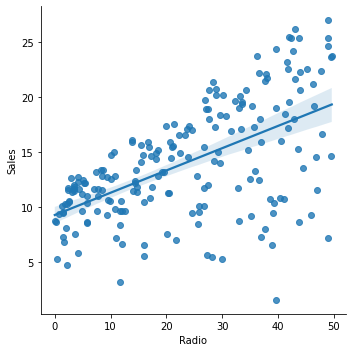

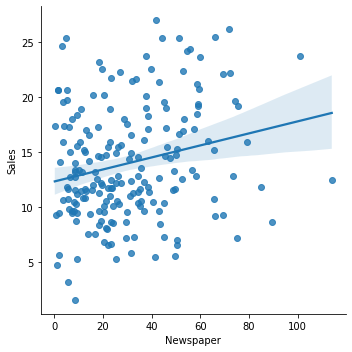

In [16]:
sns.lmplot('TV','Sales',data=df)
sns.lmplot('Radio','Sales',data=df)
sns.lmplot('Newspaper','Sales',data=df)
plt.show()

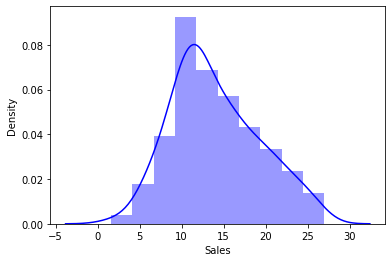

In [17]:
sns.distplot(df.Sales,bins=10,color="blue",hist=True)
plt.show()

In [18]:
num_cols = df[["TV","Radio","Newspaper"]]
a = df.corr()['Sales'].sort_values(ascending=False)
print(a)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64


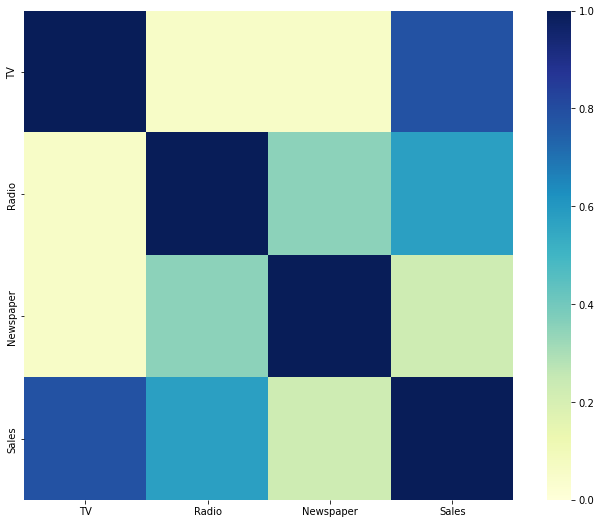

In [19]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmin = 0,vmax=1,square=True,cmap="YlGnBu",ax=ax)
plt.show()

In [20]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
x_train=x_train.astype(int)
y_train=y_train.astype(int)
x_test=x_test.astype(int)
y_test=y_test.astype(int)
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(x_train)
x_test_scaled=Sc.fit_transform(x_test)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [21]:
y_pred=lr.predict(x_test_scaled)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9222988021105912

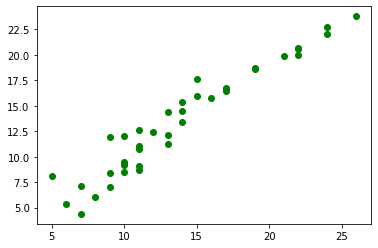

In [22]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='g')
plt.show()